In [1]:
import ROOT as r
import sys
from VBSAnalysis.EventIterator import EventIterator
from VBSAnalysis.Utils import JetSelectors as jsel
from VBSAnalysis import JetTagging 
import myplotter as plotter

Welcome to JupyROOT 6.14/00


In [2]:
f = r.TFile("data/ewk_giacomo.root")

# PROVA CON nearest_W_pair

In [77]:
cuts = [
    ("pt_min_jets", 30),
    ("eq_njets",4),
    ("eq_flag", 0),
    ("n_events", 1000)
]

In [4]:
hs = r.THStack("hs_mjj","Mjj W jet");
h_mjj = r.TH1F("mjj", "Mjj W jet", 60, 20, 150 )
h_mjj.SetLineColor(r.kRed)
h_mjj.SetFillColor(r.kRed)
h_mjj.SetFillStyle(3004)
hs.Add(h_mjj)
h_mjj_bad = r.TH1F("mjj_bad", "Mjj W jet bad", 60, 20, 150 )
h_mjj_bad.SetLineColor(r.kBlue)
h_mjj_bad.SetFillColor(r.kBlue)
h_mjj_bad.SetFillStyle(3005)
hs.Add(h_mjj_bad)
h_mjj_partons = r.TH1F("mjj_partons", "Mpartons W", 60,20,150)
h_mjj_partons.SetLineColor(r.kBlue)
h_mjj_partons.SetFillColor(r.kBlue)
h_mjj_partons.SetFillStyle(3005)


In [5]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair = jsel.nearest_W_pair(evento.partons)
    jets_pair = jsel.nearest_W_pair(evento.jets)
    h_mjj_partons.Fill((evento.partons[partons_pair[0]]+ evento.partons[partons_pair[1]]).M())
    associazione = JetTagging.check_association(evento, jets_pair, partons_pair)
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_mjj.Fill( (evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_mjj_bad.Fill((evento.jets[jets_pair[0]]+ evento.jets[jets_pair[1]]).M()) 

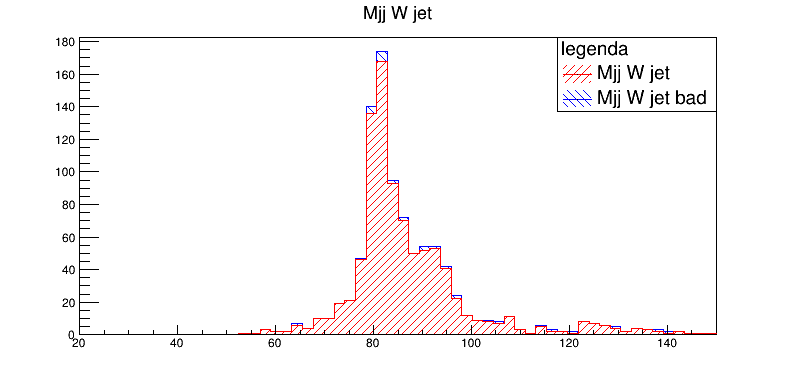

In [6]:
c1 = r.TCanvas ("c1", "canvas", 50, 50, 800, 400)
hs.Draw("hist")
h_mjj.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj)
legend.AddEntry(h_mjj_bad)
c1.Draw()
legend.Draw()



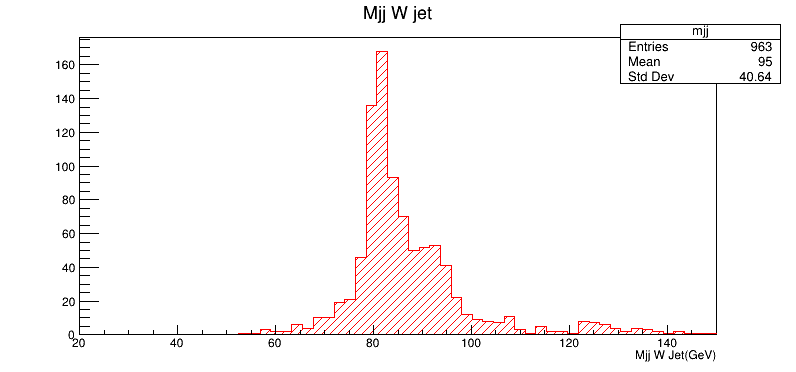

In [7]:
c2 = r.TCanvas("c2", "canvas", 50, 50, 800, 400)
h_mjj.Draw("hist")
h_mjj.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj)
c2.Draw()

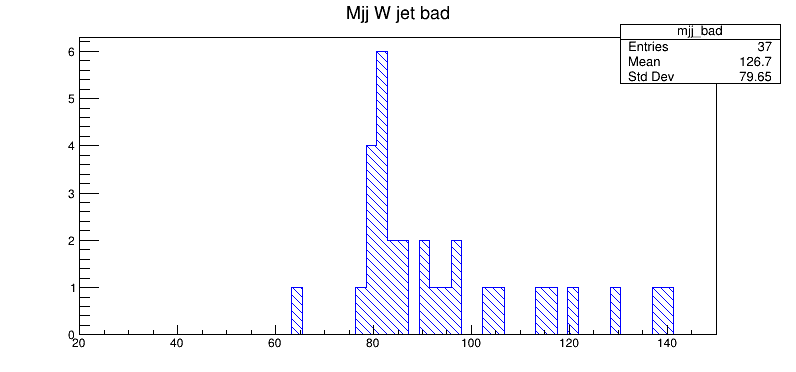

In [8]:
c3 = r.TCanvas("c3", "canvas", 50, 50, 800, 400)
h_mjj_bad.Draw("hist")
h_mjj.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_bad)
c3.Draw()

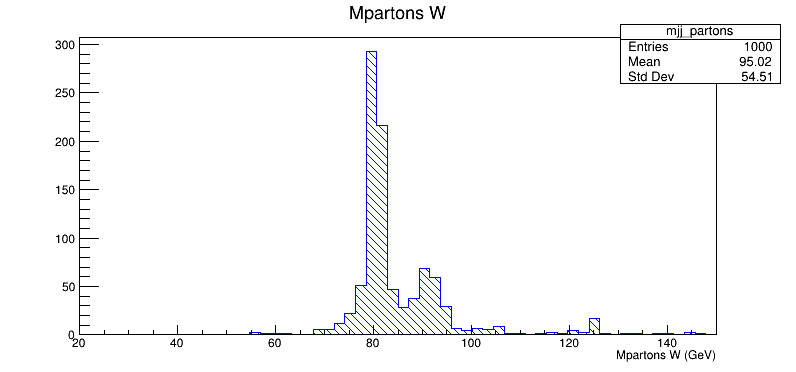

In [9]:
c4 = r.TCanvas("c4", "canvas", 50, 50, 800, 400)
h_mjj_partons.Draw("hist")
h_mjj_partons.GetXaxis().SetTitle("Mpartons W (GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_partons)
c4.Draw()

# PROVA CON  SELEZIONE MW MJJ (non ha senso)

In [10]:
hs1 = r.THStack("hs1_mw","MW W jet");
h_mw_bad = r.TH1F("mw_bad", "MW W jet bad", 60, 0, 3000 )
h_mw_bad.SetLineColor(r.kBlue)
h_mw_bad.SetFillColor(r.kBlue)
h_mw_bad.SetFillStyle(3005)
hs.Add(h_mw_bad)
h_mw = r.TH1F("mw", "Mjj W jet", 60, 0, 3000 )
h_mw.SetLineColor(r.kRed)
h_mw.SetFillColor(r.kRed)
h_mw.SetFillStyle(3004)
hs1.Add(h_mw)

In [11]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair1 = jsel.max_mjj_pair(evento.partons)
    jets_pair1 = jsel.max_mjj_pair(evento.jets)
    associazione1 = JetTagging.check_association(evento, jets_pair1, partons_pair1)
    if associazione1:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_mw.Fill( (evento.jets[jets_pair1[0]]+ evento.jets[jets_pair1[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_mw_bad.Fill((evento.jets[jets_pair1[0]]+ evento.jets[jets_pair1[1]]).M()) 

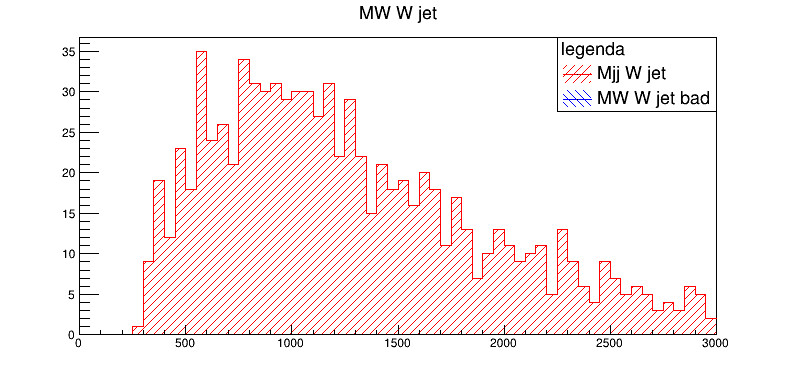

In [12]:
c5 = r.TCanvas ("c4", "canvas", 50, 50, 800, 400)
hs1.Draw("hist")
h_mw.GetXaxis().SetTitle("max Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mw)
legend.AddEntry(h_mw_bad)
c5.Draw()
legend.Draw()


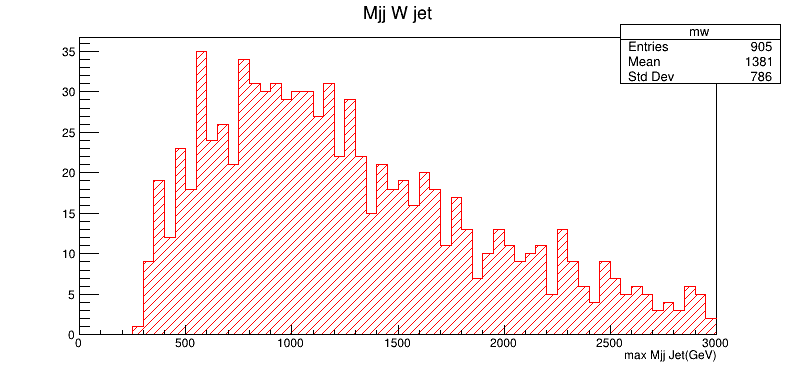

In [13]:
cz = r.TCanvas("cz", "canvas", 50, 50, 800, 400)
h_mw.Draw("hist")
h_mw.GetXaxis().SetTitle("max Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mw)
cz.Draw()

c5 = r.TCanvas("c5", "canvas", 50, 50, 800, 400)
h_mw.Draw("hist")
h_mw.GetXaxis().SetTitle("max Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mw)
c5.Draw()

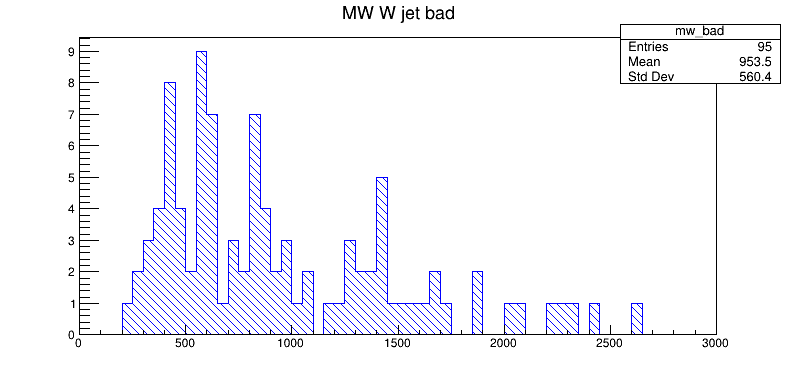

In [14]:
c6 = r.TCanvas("c6", "canvas", 50, 50, 800, 400)
h_mw_bad.Draw("hist")
h_mw.GetXaxis().SetTitle("max Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mw_bad)
c6.Draw()

# PROVA CON max_deltaeta_pair (anche questo fa schifo)

In [78]:
hs = r.THStack("hs_mjj","Mjj W jet");
h_mjj = r.TH1F("mjj", "Mjj W jet ", 60, 20, 3000 )
h_mjj.SetLineColor(r.kRed)
h_mjj.SetFillColor(r.kRed)
h_mjj.SetFillStyle(3004)
hs.Add(h_mjj)
h_mjj_bad = r.TH1F("mjj_bad ", "Mjj W jet bad ", 60, 20, 3000 )
h_mjj_bad.SetLineColor(r.kBlue)
h_mjj_bad.SetFillColor(r.kBlue)
h_mjj_bad.SetFillStyle(3005)
hs.Add(h_mjj_bad)
h_mjj_partons = r.TH1F("mjj_partons", "Mpartons W", 60,20,3000)
h_mjj_partons.SetLineColor(r.kBlue)
h_mjj_partons.SetFillColor(r.kBlue)
h_mjj_partons.SetFillStyle(3005)

In [79]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #jsel selettore di getti il cui metodo viene applicato anche ai partoni per creare le coppie
    partons_pair1 = jsel.max_deltaeta_pair(evento.partons)
    jets_pair1 = jsel.max_deltaeta_pair(evento.jets)
    h_mjj_partons.Fill((evento.partons[partons_pair1[0]]+ evento.partons[partons_pair1[1]]).M())
    associazione1 = JetTagging.check_association(evento, jets_pair1, partons_pair1)
    if associazione1:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_mjj.Fill( (evento.jets[jets_pair1[0]]+ evento.jets[jets_pair1[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_mjj_bad.Fill((evento.jets[jets_pair1[0]]+ evento.jets[jets_pair1[1]]).M()) 

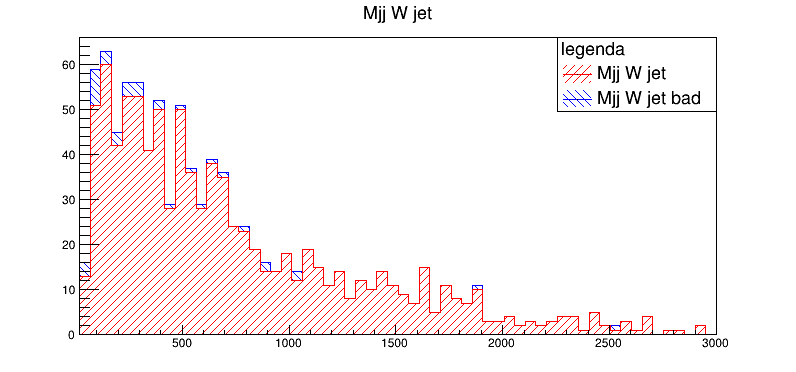

In [80]:
c1 = r.TCanvas ("c1", "canvas", 50, 50, 800, 400)
hs.Draw("hist")
h_mjj.GetXaxis().SetTitle("Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj)
legend.AddEntry(h_mjj_bad)
c1.Draw()
legend.Draw()


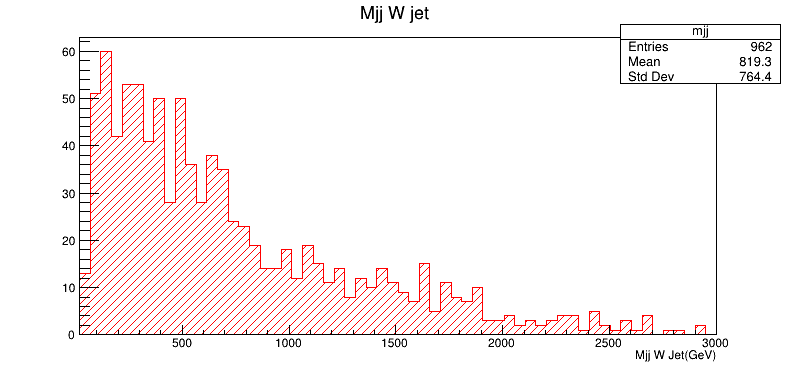

In [81]:
c2 = r.TCanvas("c2", "canvas", 50, 50, 800, 400)
h_mjj.Draw("hist")
h_mjj.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj)
c2.Draw()

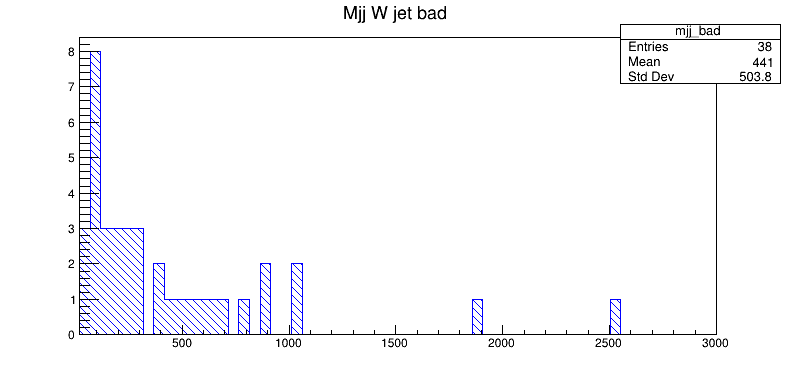

In [82]:
c3 = r.TCanvas("c3", "canvas", 50, 50, 800, 400)
h_mjj_bad.Draw("hist")
h_mjj.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_bad)
c3.Draw()

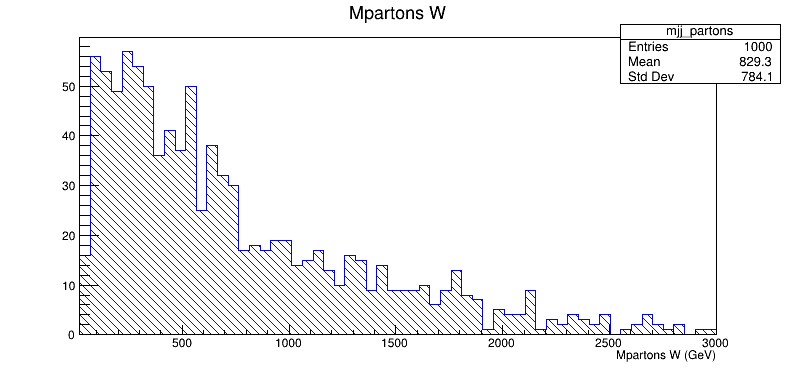

In [83]:
c4 = r.TCanvas("c4", "canvas", 50, 50, 800, 400)
h_mjj_partons.Draw("hist")
h_mjj_partons.GetXaxis().SetTitle("Mpartons W (GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_partons)
c4.Draw()

# PROVA CON TAGGING STRATEGIES

# mj mw
questo metodo applica prima una selezione per trovare i getti con massa invariante massima e crea una prima coppia. Dai getti rimanenti seleziona la coppia con massa invariante più vicina agli 80 Gev della W. Plottiamo sia il risultato della prima selezione che quella della seconda (che è quella che ci interessa)

In [84]:
#definisco uno stack per le associazioni getti partoni con strategia mjj mw (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massa
#invariante più vicina a 80 Gev) questo stack è per l'associazione getti-partoni con 80 Gev
hs_mjj_mw = r.THStack("hs_mjj_mw","Mjj W jet");
h_mjj_mw = r.TH1F("mjj_good", "Mw good ", 60, 20, 150 )
h_mjj_mw.SetLineColor(r.kRed)
h_mjj_mw.SetFillColor(r.kRed)
h_mjj_mw.SetFillStyle(3004)
hs_mjj_mw.Add(h_mjj_mw)
h_mjj_mw_bad = r.TH1F("mjj_bad ", "Mw bad ", 60, 20, 150 )
h_mjj_mw_bad.SetLineColor(r.kBlue)
h_mjj_mw_bad.SetFillColor(r.kBlue)
h_mjj_mw_bad.SetFillStyle(3005)
hs_mjj_mw.Add(h_mjj_mw_bad)

In [85]:
#definisco uno stack per le associazioni getti partoni con strategia mjj mw (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massa
#invariante più vicina a 80 Gev) questo stack è per l'associazione getti-partoni con 
#massa invariante + grande
hs_mjj_mw_max = r.THStack("hs_mjj_mw","Mjj W jet");
h_mjj_mw_max = r.TH1F("mjj_max_good", "Mjj massima good ", 60, 20, 3000 )
h_mjj_mw_max.SetLineColor(r.kRed)
h_mjj_mw_max.SetFillColor(r.kRed)
h_mjj_mw_max.SetFillStyle(3004)
hs_mjj_mw_max.Add(h_mjj_mw_max)
h_mjj_mw_max_bad = r.TH1F("mjj_max_bad ", "Mjj massima bad ", 60, 20, 3000 )
h_mjj_mw_max_bad.SetLineColor(r.kBlue)
h_mjj_mw_max_bad.SetFillColor(r.kBlue)
h_mjj_mw_max_bad.SetFillStyle(3005)
hs_mjj_mw_max.Add(h_mjj_mw_max_bad)

In [86]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_mjj_mw(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_mw(evento.jets)
    associazione = JetTagging.check_association(evento, jets_pair1.vbs_pair, partons_pair1.vbs_pair)
    associazione2 = JetTagging.check_association(evento, jets_pair1.w_pair, partons_pair1.w_pair)
    if associazione:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mjj_mw_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mjj_mw_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_mjj_mw.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_mjj_mw_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    

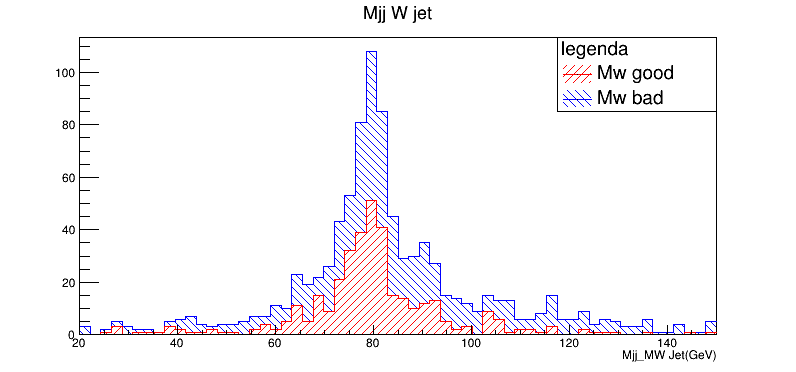

In [87]:
c1 = r.TCanvas ("c1", "canvas", 50, 50, 800, 400)
hs_mjj_mw.Draw("hist")
hs_mjj_mw.GetXaxis().SetTitle("Mjj_MW Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw)
legend.AddEntry(h_mjj_mw_bad)
c1.Draw()
legend.Draw()


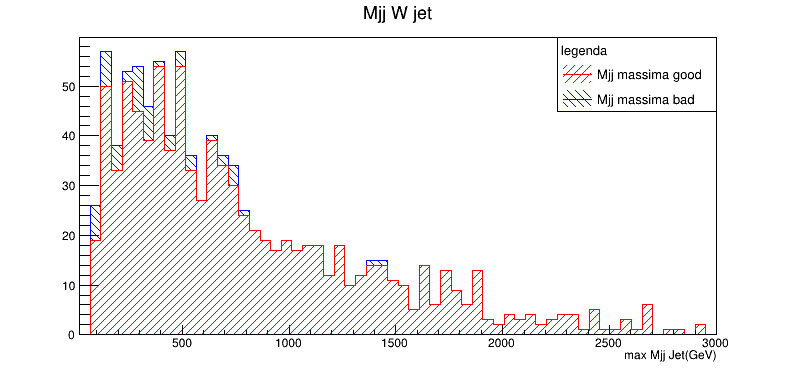

In [88]:
c2 = r.TCanvas("c2", "canvas", 50, 50, 800, 400)
hs_mjj_mw_max.Draw("hist")
hs_mjj_mw_max.GetXaxis().SetTitle("max Mjj Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw_max)
legend.AddEntry(h_mjj_mw_max_bad)
legend.Draw()
c2.Draw()


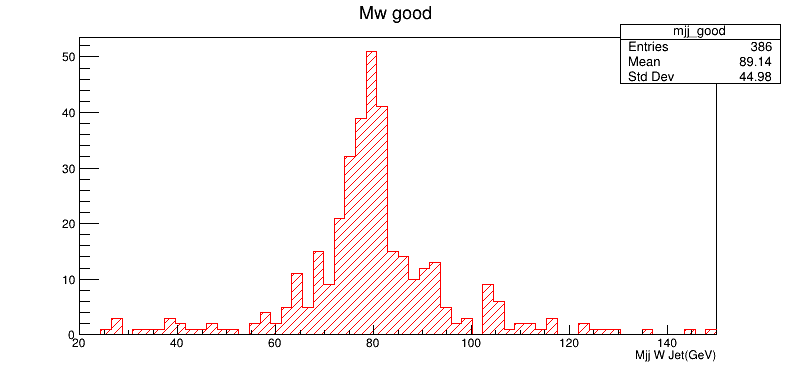

In [89]:
c3 = r.TCanvas("c3", "canvas", 50, 50, 800, 400)
h_mjj_mw.Draw("hist")
h_mjj_mw.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw)
c3.Draw()

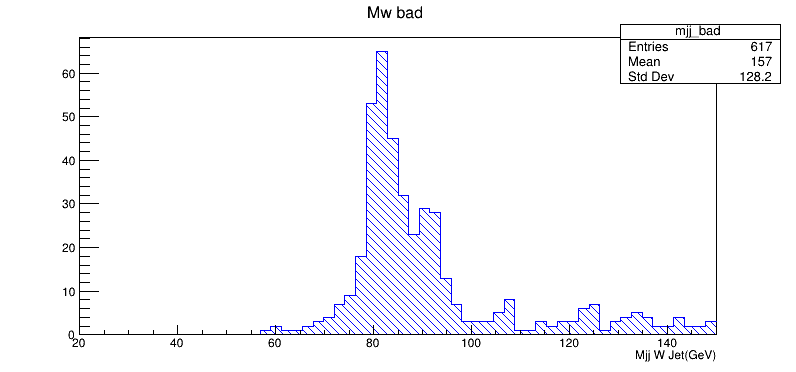

In [75]:
c4 = r.TCanvas("c4", "canvas", 50, 50, 800, 400)
h_mjj_mw_bad.Draw("hist")
h_mjj_mw_bad.GetXaxis().SetTitle("Mjj W Jet(GeV)")
legend = r.TLegend(.9,.9,0.7,0.7)
legend.SetHeader("legenda")
legend.AddEntry(h_mjj_mw_bad)
c4.Draw()